## Métodos numéricos

In [ ]:
# Markdown jupyter
# latex(F)

In [133]:
def NewtonMetodo(f, x0, n): # -> El zero de f
    xk = vector(RDF,x0)
    J = jacobian(f, f[0].arguments())
    for k in [1..n]:
        yk = J(*xk).solve_right(-f(*xk)).n()
        xk += yk #[xki.n()+yki.n() for (xki,yki) in zip(xk,yk)]
        #print(xk)
    return xk

In [134]:
def e(j, n):
    I = identity_matrix(n)
    return vector(I[j])

def dfin(f, l, j, h, xk):
    n = len(xk)
    return (f[l](*(vector(xk) + e(j, n) * h)) - f[l](*xk)) / h

def aprox_jacobiano(f, xk, h):
    m, n = len(f[0].args()), f.length()
    return Matrix([[dfin(f, l-1, j-1, h, xk) for j in [1..m]] for l in [1..n]])

def CuasiNewtonMetodo(f, x0, n): # -> El zero de f
    xk = vector(RDF,x0)
    h = 0.01
    for k in [1..n]:
        yk = aprox_jacobiano(f, xk, h).solve_right(-f(*xk)).n()
        #print(yk)
        xk += yk #[xki.n()+yki.n() for (xki,yki) in zip(xk,yk)]
        #print(xk)
        return xk

In [135]:
def BroydenMetodo(f, x0, n):
    xk = (n+1)*[0]
    xk[0] = vector(x0)
    xk[1] = NewtonMetodo(f, x0, 1)
    A = jacobian(f, f[0].arguments())(*x0).n()
    for k in [1..n-1]:
        #print(xk[k])
        s = xk[k] - xk[k-1]
        y = f(*xk[k]) - f(*xk[k-1])
        A = (A + ((y-A*s)/(s.norm()^2)).column() * s.row()).n()
        xk[k+1] = (xk[k] - A.inverse()*f(*xk[k])).n()
    return xk[n]

## Ejemplos

In [180]:
# Ejemplo sencillo en 2D
H(x,y) = (x-1+exp(x*y)/10,y-1+sin(x*y)/10)
x0 = (2.,2.)

In [181]:
pN = [NewtonMetodo(H,x0,n) for n in [1..10]]

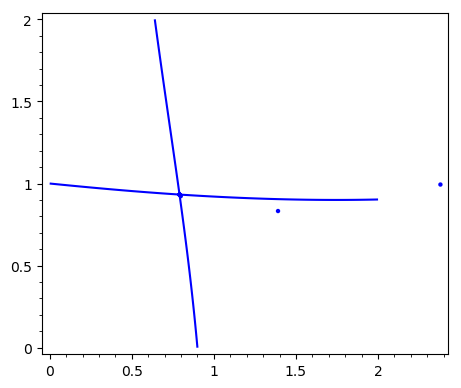

In [182]:
implicit_plot( H(x,y)[0]==0, (x, 0, 2),(y,0,2)) + implicit_plot( H(x,y)[1]==0, (x, 0, 2),(y,0,2)) + points(pN)
# Converge siempre muy rápido este método

In [136]:
# Ejemplo para evaluar
f1(x,y,z) = 3*x - cos(y*z) - 1/2
f2(x,y,z) = x^2 - 81*(y+0.1)^2 + sin(z) + 1.06
f3(x,y,z) = exp(-x*y) + 20*z + (10*pi-3)/3
F(x,y,z) = (f1(x,y,z),f2(x,y,z),f3(x,y,z))
x0 = (0.1,-0.1,0.1)

In [157]:
%time
NewtonMetodo(H, x0, 100)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs


(0.7908889919716461, 0.9327416000885209)

In [158]:
%time
CuasiNewtonMetodo(H, x0, 100)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 14.8 µs


(0.8999999999999992, 0.9999999999999991)

In [160]:
%time
BroydenMetodo(H, x0, 100)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs


(0.790888991971646, 0.932741600088521)

In [140]:
#Ejemplo
G(x) = (2*x^2+1,)

(1.3761020016539351)

In [141]:
CuasiNewtonMetodo(G,(-1,),100)

(-0.24623115577889554)

In [142]:
BroydenMetodo(G,(-1,),100)

(-0.0661003907838884)

In [162]:
pN

[(0.9, 0),
 (0.7949339897370287, 0),
 (0.7908894347301001, 0),
 (0.7908889919716048, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 (0.7908889919716461, 0),
 

In [169]:
Gp(x) = 2*x^2-1
#pN = point(zip([xk for xk in NewtonMetodo(G,(-1,),100)]))


TypeError: implicit_plot() missing 1 required positional argument: 'yrange'

In [144]:
%time
NewtonMetodo(G, x0, 100)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.58 µs


TypeError: unsupported operand parent(s) for +: 'Vector space of dimension 3 over Real Double Field' and 'Vector space of dimension 1 over Real Field with 53 bits of precision'

In [145]:
%time
CuasiNewtonMetodo(G, x0, 100)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 15 µs


TypeError: unsupported operand parent(s) for +: 'Vector space of dimension 3 over Real Double Field' and 'Vector space of dimension 1 over Real Field with 53 bits of precision'

In [146]:
# El Método e Broyden no se puede dibujar, pues tiene que tener n variables de entrada y
# n variables de salida

In [147]:
#plot(xk(t),(t,-10,10))

In [148]:
x0=(0,)
h(x)=(-(x-0.5)^2,)
NewtonMetodo(h, x0, 100)

(0.5)

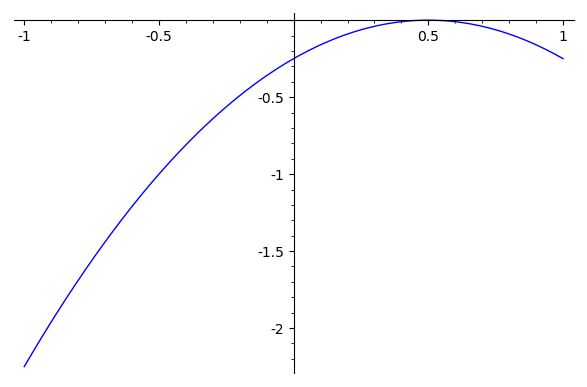

In [149]:
plot(h[0])